# Deep Learning Project - Traffic Signs Image Classification

In [1]:
import os, shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Overview of the training data

In [2]:
#setting the training directory (the training images can be found there, already sorted by class into folders)
base_training_dir = "/Users/franz/Desktop/DL Project/Train/Training"

#storing all the folder names that belong to the respective classes
all_classes = sorted(i for i in os.listdir(base_training_dir) if i.startswith("0"))

print("There are", len(all_classes), "different classes within the training data!")

There are 43 different classes within the training data!


In [3]:
#getting the number of images within each class of the training data
amount_per_class = {}

for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    amount_per_class[i] = len(sorted(i for i in os.listdir(directory) if i.startswith("0")))

amount_per_class_df = pd.DataFrame.from_dict(amount_per_class, orient='index').rename(columns={0:"amount"})
amount_per_class_df.index.name = 'class'

#remove the "#" of the following line to display the number of images within each class
#amount_per_class_df

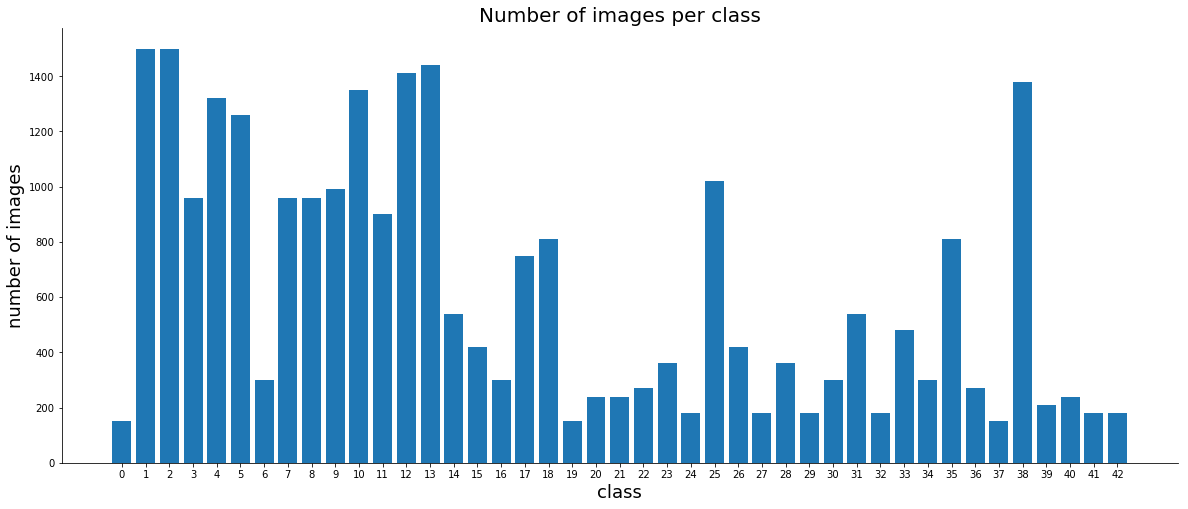

In [4]:
#displaying the number of images per class visually

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
plt.bar(amount_per_class_df.index, amount_per_class_df.amount)
plt.title("Number of images per class", fontsize=20)
plt.xlabel('class', fontsize=18)
plt.ylabel('number of images', fontsize=18)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(amount_per_class_df.index)
plt.show()

As it can be seen in the bar chart, the dataset is highly unbalanced. Some classes have 1500 instances, while others only have 150.

In [5]:
#displaying the 20 classes with the fewest images
amount_per_class_df.sort_values("amount").head(20).T

class,0,37,19,32,29,27,24,41,42,39,21,20,40,22,36,16,30,34,6,23
amount,150,150,150,180,180,180,180,180,180,210,240,240,240,270,270,300,300,300,300,360


Within each class, there are several groups of images, that belong together (these are basically all images of the very same traffic sign, that just differ in that they were made as a series while approaching the actual sign). These series of images shouldn't be splitted later when the data is split into training and validation sets, so some precautions might be useful:

In [6]:
#checking the size(=amount of images) of these series and whether they are all having the same size

#running a for loop over all classes
for i in range(len(all_classes)):
    directory = base_training_dir + "/" + all_classes[i]
    
    #get the names of all images within a class
    list_of_images = sorted(i for i in os.listdir(directory) if i.startswith("0"))

    image_series = []
    
    #store all the prefixes of the images (which correspond to the series they belong to)
    for element in list_of_images:
        image_series.append(element.split("_")[0])
    
    #count the frequency of each prefix, which equals the size of each respective series
    image_counts = pd.Series(image_series).value_counts().sort_index()

    for element in image_counts.values.tolist():
        if element != image_counts.values.tolist()[0]:
            #this line will not show any output, as long as all the series have the same length
            print("There is a series whose number doesn't match the others in class", all_classes[i])
            

#as there is no output, it is validated that all these series have the same size
print("Each series of images contains exactly", image_counts.values.tolist()[0], "images!")

Each series of images contains exactly 30 images!


## Split into training and validation datasets

As already mentioned, it is important for the split into training and validation sets that the individual image series stay together. As a first approach, there will be only 150 images used per class, as this number corresponds to the amount of images in the "smallest" class. This will fix the problem of imbalance in the dataset. Subsequently, the data has to be splitted by a 3:2 (90:60) ratio into training and validation set, in order to guarantee that the series will stay together.

In [7]:
#creating folders within the class folders for the training and validation sets
for i in range(len(all_classes)):
    directory_train = base_training_dir + "/" + all_classes[i] + "/train"
    directory_val = base_training_dir + "/" + all_classes[i] + "/validation"

    os.mkdir(directory_train)
    os.mkdir(directory_val)

In [8]:
#creating a list that contains the names of the 1st, 2nd and 3rd series of images (3x30 names)
training_names = []

for i in range(3):
    name = "0000" + str(i)
    for i2 in range(30):
        if i2 < 10:
            name = name + "_0000" + str(i2) + ".ppm"
            training_names.append(name)
            name = "0000" + str(i)
        else:
            name = name + "_000" + str(i2) + ".ppm"
            training_names.append(name)
            name = "0000" + str(i)


#creating a list that contains the names of the 4th and 5th series of images (2x30 names)
val_names = []

for i in range(3,5):
    name = "0000" + str(i)
    for i2 in range(30):
        if i2 < 10:
            name = name + "_0000" + str(i2) + ".ppm"
            val_names.append(name)
            name = "0000" + str(i)
        else:
            name = name + "_000" + str(i2) + ".ppm"
            val_names.append(name)
            name = "0000" + str(i)

In [9]:
#copying the first 3 series within a class into the train folder and the 2 consecutive series into the validation folder 
for i in range(len(all_classes)):

    for name in training_names:
        src = base_training_dir + "/" + all_classes[i] + "/" + name
        dst = base_training_dir + "/" + all_classes[i] + "/train" + "/" + name
        shutil.copyfile(src, dst)
    
    for name in val_names:
        src = base_training_dir + "/" + all_classes[i] + "/" + name
        dst = base_training_dir + "/" + all_classes[i] + "/validation" + "/" + name
        shutil.copyfile(src, dst)

Now, there should be exactly 90 images within the train folder of each class and 60 images within the validation folder. Having 43 different classes, this means that there are a total of 3,870 (90x43) training images and another 2,580 (60x43) validation images. A sanity check will show if this worked correctly:

In [10]:
for i in range(len(all_classes)):
    print("Class", i, ": training set size =", len(os.listdir(base_training_dir + "/" + all_classes[i] + "/train")), "; validation set size:", len(os.listdir(base_training_dir + "/" + all_classes[i] + "/validation")))

Class 0 : training set size = 90 ; validation set size: 60
Class 1 : training set size = 90 ; validation set size: 60
Class 2 : training set size = 90 ; validation set size: 60
Class 3 : training set size = 90 ; validation set size: 60
Class 4 : training set size = 90 ; validation set size: 60
Class 5 : training set size = 90 ; validation set size: 60
Class 6 : training set size = 90 ; validation set size: 60
Class 7 : training set size = 90 ; validation set size: 60
Class 8 : training set size = 90 ; validation set size: 60
Class 9 : training set size = 90 ; validation set size: 60
Class 10 : training set size = 90 ; validation set size: 60
Class 11 : training set size = 90 ; validation set size: 60
Class 12 : training set size = 90 ; validation set size: 60
Class 13 : training set size = 90 ; validation set size: 60
Class 14 : training set size = 90 ; validation set size: 60
Class 15 : training set size = 90 ; validation set size: 60
Class 16 : training set size = 90 ; validation set

As it can be seen, it worked correctly!